# Are people who attended college less religious?

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [4]:
from __future__ import print_function, division

%matplotlib inline

import pandas as pd
import numpy as np

import thinkstats2
import thinkplot
import utils

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

Reading data from the [General Social Survey](https://gssdataexplorer.norc.org/projects/29853)

In [3]:
gss = utils.ReadGss('gss_religion_data')
print(gss.shape)
gss.head()

(62466, 11)


,year,conclerg,bible,cohort,age,wtssall,ballot,relig,educ,id_,god
0,1972,0,0,1949,23,0.4446,0,3,16,1,0
1,1972,0,0,1902,70,0.8893,0,2,10,2,0
2,1972,0,0,1924,48,0.8893,0,1,12,3,0
3,1972,0,0,1945,27,0.8893,0,5,17,4,0
4,1972,0,0,1911,61,0.8893,0,1,12,5,0


Resampling (bootstrapping to be more specific) to account for sampling weights.

In [5]:
sample = utils.ResampleByYear(gss)
sample.head()

,year,conclerg,bible,cohort,age,wtssall,ballot,relig,educ,id_,god
0,1972,0,0,1948,24,0.8893,0,1,14,17,0
1,1972,0,0,1903,69,0.8893,0,1,8,404,0
2,1972,0,0,1921,51,0.8893,0,2,14,810,0
3,1972,0,0,1919,53,0.8893,0,1,14,42,0
4,1972,0,0,1918,54,0.8893,0,1,12,519,0


Cleaning variables

In [6]:
utils.fill_missing(sample, 'educ')

177

In [7]:
utils.values(sample, 'educ')

0.0       147
1.0        46
2.0       141
3.0       240
4.0       296
5.0       365
6.0       816
7.0       833
8.0      2489
9.0      1979
10.0     2817
11.0     3721
12.0    19269
13.0     5529
14.0     6987
15.0     2878
16.0     7716
17.0     1792
18.0     2228
19.0      842
20.0     1335
Name: educ, dtype: int64

Anyone with 13 or more years of school is considered to have some college.

In [8]:
sample['college'] = sample.educ >= 13
sample.college.mean()

0.46916722697147251

Religion code 4 represents people who report no religious affiliation.

In [9]:
utils.fill_missing(sample, 'relig')

290

In [10]:
utils.values(sample, 'relig')

1.0     35623
2.0     15829
3.0      1182
4.0      7234
5.0      1027
6.0       202
7.0       110
8.0        54
9.0       186
10.0      137
11.0      709
12.0       37
13.0      136
Name: relig, dtype: int64

In [11]:
sample['none'] = sample.relig ==4
sample.none.mean()

0.11580699900746005

Group by year and college status.

In [12]:
grouped = sample.groupby(['year', 'college'])

Plot fraction of "Nones" by year for the college and no-college groups.

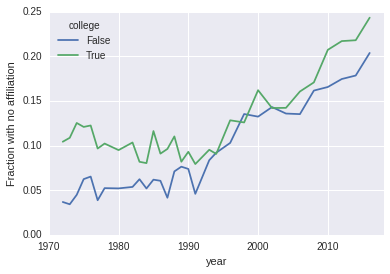

In [13]:
percent_none = grouped.none.mean().unstack()
percent_none.plot()
plt.ylabel('Fraction with no affiliation')
plt.xlim([1970, 2018]);

Plot the difference in percentage points between the college and no-college groups.

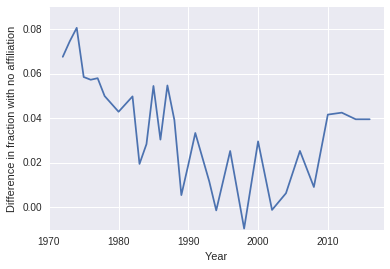

In [14]:
diff = percent_none[True] - percent_none[False]
plt.plot(diff)
plt.xlabel('Year');
plt.ylabel('Difference in fraction with no affiliation')
plt.xlim([1970, 2018]);

Estimate the fraction of people in the college-age population with no affiliation.

In [15]:
college_none = 30.9
no_college_none = college_none - 6
fraction_college = 0.65
fraction_no_college = 1-fraction_college

fraction_none = fraction_college * college_none + fraction_no_college * no_college_none
fraction_none

28.799999999999997

In [16]:
college_none - 0.35 * 6

28.799999999999997